In [ ]:
!wget 'https://www.manythings.org/anki/ben-eng.zip'
!unzip /content/ben-eng.zip
# ben_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt'
# eng_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/eng.txt'


# with open(ben_txt) as f:
#  ben_lst = f.read().split("\n")[:-1]
# with open(eng_txt) as f:
#  en_lst = f.read().split("\n")[:-1]
# len(ben_lst),len(en_lst)




In [ ]:
for line in lines[:20]:
    english, spanish = line.split("\t")
    spanish = "[start] " + spanish + " [end]"
    text_pairs.append((english, spanish))

In [17]:
ben_lst[:10],len(ben_lst)

(['সে ঘুরে ল্যাংডনের চোখের দিকে তাকায়।',
  'সব মানুষের মধ্যে সমতা আনতে হলে কারও না কারও স্বাধীনতায় হস্তক্ষেপ করতেই হবে।',
  'যাই জিজ্ঞেস কর না কেন, সব প্রশ্নের জবাব দিব ডিনারের পর।',
  'ঠিক যখন আমি সভাকে শুভরাত জানিয়ে বিদায় নিতে উদ্যত, একজন লোক সত্বর আমার কাছে এসে নিজের পরিচয় দেয়।',
  'যেতে দিন!',
  'এবার ক্যামারলেনগো ঘুরে দাঁড়াল আবার, তাকাল অন্য সৈনিকদের দিকে, জোয়ানগণ, আমি আর কোন প্রাণঘাতি ঘটনা দেখতে চাই না এই সন্ধ্যায়।',
  'তাদের ট্যাক্সি এখন কোথায়?',
  'বেশিরভাগ গবেষকই মনে করেন যে, এতসব গুরুত্বপূর্ণ আবিষ্কারের পেছনে নিশ্চয়ই সেপিয়েন্সদের বুদ্ধিবৃত্তিক দক্ষতার কোনো পরিবর্তন দায়ী।',
  'দশকের পর দশক ধরে এসব প্রাণীর জীবাশ্ম আর দেহাবশেষের খোঁজে দুই আমেরিকার পাহাড় ও সমতলে চষে বেড়াচ্ছেন বিশেষজ্ঞরা। যখনই তাঁরা কোনো কিছু খুঁজে পাচ্ছেন পরম যত্নে সেগুলো পাঠিয়ে দিচ্ছেন গবেষণাগারে।',
  'এটা প্রাপ্ত বয়স্কদের জন্য এক রকমের স্কুলও বলা চলে।'],
 2753069)

In [1]:
NUM_SENTENCES = 20000 # Use only the first 20,000 records.
MAX_NUM_WORDS = 50000 # Use 20,000 words for tokenizing
MAX_SENT_LEN = 20

EMBEDDING_SIZE = 100

LSTM_NEURONS = 100

BATCH_SIZE = 64
EPOCHS = 5

In [2]:

inputs = []
outputs_i = []
outputs = []

data_file = open('ben.txt', encoding='utf-8')


# 2.7M

In [5]:
inputs = []
outputs_i = []
outputs = []

data_file = open('ben.txt', encoding='utf-8')

count = 0
for line in data_file:
    count += 1
    if count > NUM_SENTENCES:
        break
    if '\t' not in line:
        continue
    ip, temp_op, extra = line.rstrip().split('\t')
    op_i = '<sos> '+temp_op
    op = temp_op+' <eos>'
    inputs.append(ip)
    outputs_i.append(op_i)
    outputs.append(op)

print('Total inputs =', len(inputs))
print('Total intermediate outputs =', len(outputs_i))
print('Total outputs =', len(outputs))
print('\nSample:')
print(inputs[100])
print(outputs_i[100])
print(outputs[100])

Total inputs = 6513
Total intermediate outputs = 6513
Total outputs = 6513

Sample:
It's me.
<sos> আমি।
আমি। <eos>


In [27]:
len(baki[6]),len(inputs)

(190, 72327)

In [6]:
outputs_i[:4],inputs[:4]

(['<sos> যাও।', '<sos> যান।', '<sos> যা।', '<sos> পালাও!'],
 ['Go.', 'Go.', 'Go.', 'Run!'])

# ORIG

In [7]:
from keras.preprocessing.text import Tokenizer

input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(inputs)

inputs_seq = input_tokenizer.texts_to_sequences(inputs)

inputs_word2index = input_tokenizer.word_index
print('Total unique words in input:', len(inputs_word2index))

inputs_numwords = len(inputs_word2index)+1

inputs_maxlen = max(len(s) for s in inputs_seq)
print('Length of longest sentence in input:', inputs_maxlen)

output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(outputs_i + outputs)

outputs_i_seq = output_tokenizer.texts_to_sequences(outputs_i)
outputs_seq = output_tokenizer.texts_to_sequences(outputs)

outputs_word2index = output_tokenizer.word_index
print('Total unique words in output:', len(outputs_word2index))

outputs_numwords = len(outputs_word2index)+1

outputs_maxlen = max(len(s) for s in outputs_seq)
print('Length of longest sentence in output:', outputs_maxlen)

Total unique words in input: 2715
Length of longest sentence in input: 20
Total unique words in output: 5242
Length of longest sentence in output: 19


In [8]:
print('Total inputs =', len(inputs))
print('Total intermediate outputs =', len(outputs_i))
print('Total outputs =', len(outputs))


Total inputs = 6513
Total intermediate outputs = 6513
Total outputs = 6513


In [9]:
from keras.preprocessing.sequence import pad_sequences

encoder_input_sequences = pad_sequences(inputs_seq, maxlen=inputs_maxlen,padding='post')
print('encoder_input_sequences shape:', encoder_input_sequences.shape)

decoder_input_sequences = pad_sequences(outputs_i_seq, maxlen=outputs_maxlen, padding='post')
print('decoder_inputs_sequences shape:', decoder_input_sequences.shape)

decoder_output_sequences = pad_sequences(outputs_seq, maxlen=outputs_maxlen, padding='post')
print('decoder_output_sequences shape:', decoder_output_sequences.shape)

encoder_input_sequences shape: (6513, 20)
decoder_inputs_sequences shape: (6513, 19)
decoder_output_sequences shape: (6513, 19)


In [10]:
id=123

inputs_seq[id],inputs[id],encoder_input_sequences[id]

([31, 188],
 'We lost.',
 array([ 31, 188,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]))

In [11]:
# input_tokenizer.texts_to_sequences(inputs),len(outputs_seq)
id=123

outputs_i_seq[id],outputs_i[id],decoder_input_sequences[id]

([1, 16, 955, 224],
 '<sos> আমরা হেরে গেছিলাম।',
 array([  1,  16, 955, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0]))

In [32]:
bigg=[]
pos=[]
avlen=0
lest=0
for i,x in enumerate(outputs_seq):
  avlen+=len(x)
  if 1< len(x)<30 :
    lest+=1
  if len(x)>40:

    bigg.append(x)
    pos.append(i)
len(bigg),pos,avlen//len(inputs),lest

(0, [], 11, 71652)

In [33]:
bigg[1]

IndexError: list index out of range

In [152]:
inputs_seq[1321]

[119, 19, 521]

In [12]:
encoder_input_sequences[10]

array([457,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [ ]:
from bnlp import BengaliGlove

bengali_glove = BengaliGlove() # will automatically download pretrained model

ModuleNotFoundError: No module named 'bnlp'

In [14]:
from numpy import asarray, zeros
embeddings_dict = dict()
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip
glove_file = open('/content/drive/MyDrive/translt/glove.6B.100d.txt', encoding='utf8')

In [15]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector = asarray(records[1:], dtype='float32')
    embeddings_dict[word] = vector
glove_file.close()

In [38]:
for i,x in enumerate(embeddings_dict):
  print(x,embeddings_dict[x][:10])
  if i==10:break


the [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459]
, [-0.10767   0.11053   0.59812  -0.54361   0.67396   0.10663   0.038867
  0.35481   0.06351  -0.094189]
. [-0.33979   0.20941   0.46348  -0.64792  -0.38377   0.038034  0.17127
  0.15978   0.46619  -0.019169]
of [-0.1529  -0.24279  0.89837  0.16996  0.53516  0.48784 -0.58826 -0.17982
 -1.3581   0.42541]
to [-0.1897    0.050024  0.19084  -0.049184 -0.089737  0.21006  -0.54952
  0.098377 -0.20135   0.34241 ]
and [-0.071953  0.23127   0.023731 -0.50638   0.33923   0.1959   -0.32943
  0.18364  -0.18057   0.28963 ]
in [ 0.085703 -0.22201   0.16569   0.13373   0.38239   0.35401   0.01287
  0.22461  -0.43817   0.50164 ]
a [-0.27086   0.044006 -0.02026  -0.17395   0.6444    0.71213   0.3551
  0.47138  -0.29637   0.54427 ]
" [-0.30457  -0.23645   0.17576  -0.72854  -0.28343  -0.2564    0.26587
  0.025309 -0.074775 -0.3766  ]
's [ 0.58854 -0.2025   0.73479 -0.68338 -0.19675 -0.1802  -0.39177

In [39]:
len(inputs_word2index)+1,MAX_NUM_WORDS

(31265, 50000)

In [40]:
num_words =min(MAX_NUM_WORDS, len(inputs_word2index)+1)

embedding_matrix = zeros((num_words, EMBEDDING_SIZE))

for word, index in inputs_word2index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [19]:
from numpy import asarray, zeros

embeddings_dict = dict()

glove_file = open('/content/drive/MyDrive/translt/glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector = asarray(records[1:], dtype='float32')
    embeddings_dict[word] = vector

glove_file.close()

num_words = min(MAX_NUM_WORDS, len(inputs_word2index)+1)

embedding_matrix = zeros((num_words, EMBEDDING_SIZE))

for word, index in inputs_word2index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

**en:2715 bn:5242**

---



In [13]:
from keras.layers import Input, Embedding, LSTM, Dense

encoder_embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=None, input_length=inputs_maxlen)
decoder_embedding_layer = Embedding(outputs_numwords, LSTM_NEURONS)

NameError: name 'num_words' is not defined

In [21]:
len(decoder_output_sequences),outputs_numwords

(6513, 5243)

In [160]:
import tensorflow as tf

# Assuming source_vectorization and target_vectorization are TextVectorization layers

batch_size =1000

def format_dataset(eng, ben):
    eng = source_vectorization(eng)
    ben = target_vectorization(ben)
    # print(ben[:,:10] )
    # Ensure ben has the expected shape before slicing
    # ben = tf.reshape(ben, [tf.shape(ben)[0], -1])  # Reshape to 2D
    return {"eng": eng, "ben": ben[:, :-1]}, ben[:, 1:]

def make_dataset(pairs):
    eng_texts, ben_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    ben_texts = list(ben_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.shuffle(2048).prefetch(16).cache()


In [ ]:
import tensorflow as tf
import string
import re
from tensorflow.keras import layers
sequence_length=30
max_token=50000
source_vectorization = layers.TextVectorization(
  max_tokens=max_token,
  output_mode="int",
  output_sequence_length=sequence_length,
  # standardize=custom_standardization
)
target_vectorization = layers.TextVectorization(
  max_tokens=max_token,
  output_mode="int",
  output_sequence_length=sequence_length + 1,

)

In [ ]:
def createVector(pairs,vectorztn):
  batch_size = 10000  # Adjust the batch size based on your available memory
  num_batches = len(pairs) // batch_size + 1

  for i in range(num_batches):
      start_idx = i * batch_size
      end_idx = min((i + 1) * batch_size, len(pairs))
      batch_texts = pairs[start_idx:end_idx]
      vectorztn.adapt(batch_texts)
  # return vectorztn
      # target_vectorization.adapt(batch_ben_texts)  # Uncomment if needed



In [ ]:
len(inputs),len(outputs)

(357768, 357768)

In [ ]:
# createVector(inputs,source_vectorization)
createVector(outputs,target_vectorization)

In [ ]:

vocabulary = source_vectorization.get_vocabulary()

# Access other relevant information
max_tokens = source_vectorization.get_config()['max_tokens']
output_sequence_length = source_vectorization.get_config()['output_sequence_length']
output_mode = source_vectorization.get_config()['output_mode']
standardization = source_vectorization.get_config()['standardize']

# Print or inspect the information
print("Vocabulary:", vocabulary)
print("Max Tokens:", max_tokens)
print("Output Sequence Length:", output_sequence_length)
print("Output Mode:", output_mode)
print("Standardization:", standardization)


Vocabulary: ['', '[UNK]', 'the', 'of', 'and', 'in', 'to', 'a', 'was', 'is', 'as', 'for', 'on', 'he', 'are', 'by', 'with', 'from', 'his', 'at', 'it', 'were', 'bangladesh', 'this', 'an', 'also', 'that', 'or', 'bengal', 'be', 'their', 'dhaka', 'but', 'km', 'have', 'its', 'upazila', 'under', 'which', 'has', 'all', 'had', 'not', 'government', 'there', 'one', 'these', 'after', 'other', 'they', 'been', 'some', 'during', 'about', 'india', 'population', 'two', 'district', '1', 'school', 'into', 'khan', 'area', 'university', 'many', 'however', 'water', 'most', 'east', 'between', 'college', 'people', 'sq', 'number', 'muslim', 'land', 'literacy', 'rural', 'main', 'mosque', 'village', 'first', 'rate', 'him', 'union', 'new', 'time', 'pakistan', 'road', 'others', 'country', 'bangla', 'known', 'century', 'up', 'total', 'only', 'established', 'used', 'female', 'calcutta', 'such', 'national', 'education', 'made', 'years', 'three', 'may', 'institutions', 'important', 'through', 'river', 'over', 'more', '

In [31]:
 # zeros(( len(inputs), c, outputs_numwords),  dtype='float32')

# replaced this line with tf.onehot
import tensorflow as tf

# requires the padded output sequence to make the onehot output ...
decoder_outputs_onehot  = tf.one_hot(decoder_output_sequences, depth=outputs_numwords)
print('decoder_outputs_onehot shape:', decoder_outputs_onehot.shape)


decoder_outputs_onehot shape: (6513, 19, 5243)


In [32]:
decoder_outputs = [[156, 410, 2], [21, 1609, 2], [21, 680, 2], [21, 798, 2], [21, 2475, 2]]
padded_decoder_outputs = pad_sequences(decoder_outputs, padding='post')



**MODEL>>>>>>>>>>>>>>>>>>>**

In [161]:
from tensorflow.keras import layers

encoder_inputs = Input(shape=(inputs_maxlen,),name="eng")
encoder_inputs_emb = encoder_embedding_layer(encoder_inputs)

# attentiion
attention = layers.MultiHeadAttention( num_heads=8, key_dim=64 )
norm=layers.LayerNormalization()

attention_output = attention(encoder_inputs_emb, encoder_inputs_emb, attention_mask=None)
proj_input = norm(encoder_inputs_emb+ attention_output)
# attention END

# encoder
encoder_lstm_1 = layers.LSTM(LSTM_NEURONS, return_sequences=True, return_state=True)
encoder_outputs_1, _, _ = encoder_lstm_1(proj_input)

# Add a second LSTM layer
encoder_lstm_2 = layers.LSTM(LSTM_NEURONS, return_state=True)
encoder_outputs, h, c = encoder_lstm_2(encoder_outputs_1)
encoder_states = [h, c]

encoder_outputs = layers.BatchNormalization()(encoder_outputs)
encoder_outputs = layers.Dropout(0.3)(encoder_outputs)
# encoder END

# decoder
decoder_inputs = Input(shape=(outputs_maxlen,),name="ben")
decoder_inputs_emb = decoder_embedding_layer(decoder_inputs)
decoder = LSTM(LSTM_NEURONS, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder(decoder_inputs_emb, initial_state=encoder_states)


decoder_outputs = layers.BatchNormalization()(decoder_outputs)
decoder_outputs = layers.Dropout(0.8)(decoder_outputs)

# decoder END

output_dense_layer = Dense(outputs_numwords, activation='softmax')
outputs = output_dense_layer(decoder_outputs)

In [69]:
# encoder_inputs = Input(shape=(inputs_maxlen,))
# encoder_inputs_emb = encoder_embedding_layer(encoder_inputs)
# encoder = LSTM(LSTM_NEURONS, return_state=True)
# encoder_outputs, h, c = encoder(encoder_inputs_emb)
# encoder_states = [h, c]

# decoder_inputs = Input(shape=(outputs_maxlen,))
# decoder_inputs_emb = decoder_embedding_layer(decoder_inputs)
# decoder = LSTM(LSTM_NEURONS, return_sequences=True, return_state=True)
# decoder_outputs, _, _ = decoder(decoder_inputs_emb, initial_state=encoder_states)

# output_dense_layer = Dense(outputs_numwords, activation='softmax')
# outputs = output_dense_layer(decoder_outputs)

In [70]:
decoder_output_sequences.shape

(6513, 19)

In [162]:
from keras.models import Model

model = Model([encoder_inputs, decoder_inputs], outputs)
model.compile(
          optimizer='rmsprop',
         loss="sparse_categorical_crossentropy",

              metrics=['accuracy'])
print(model.summary())





Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 eng (InputLayer)            [(None, 20)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 20, 100)              271600    ['eng[0][0]']                 
                                                                                                  
 multi_head_attention_12 (M  (None, 20, 100)              206436    ['embedding_4[0][0]',         
 ultiHeadAttention)                                                  'embedding_4[0][0]']         
                                                                                                  
 tf.__operators__.add_12 (T  (None, 20, 100)              0         ['embedding_4[0][0]',  

In [164]:
trn = model.fit([encoder_input_sequences, decoder_input_sequences],
               decoder_output_sequences,
               batch_size=BATCH_SIZE, epochs=20, validation_split=0.3
               )




Epoch 1/20
72/72 [==============================] - 2s 28ms/step - loss: 1.1178 - accuracy: 0.8333 - val_loss: 2.4132 - val_accuracy: 0.6811
Epoch 2/20
72/72 [==============================] - 2s 25ms/step - loss: 1.1106 - accuracy: 0.8336 - val_loss: 2.3754 - val_accuracy: 0.6852
Epoch 3/20
72/72 [==============================] - 2s 24ms/step - loss: 1.1059 - accuracy: 0.8354 - val_loss: 2.4183 - val_accuracy: 0.6802
Epoch 4/20
72/72 [==============================] - 2s 31ms/step - loss: 1.0994 - accuracy: 0.8361 - val_loss: 2.3724 - val_accuracy: 0.6854
Epoch 5/20
72/72 [==============================] - 2s 30ms/step - loss: 1.0950 - accuracy: 0.8360 - val_loss: 2.3516 - val_accuracy: 0.6866
Epoch 6/20
72/72 [==============================] - 2s 25ms/step - loss: 1.0851 - accuracy: 0.8368 - val_loss: 2.3737 - val_accuracy: 0.6852
Epoch 7/20
72/72 [==============================] - 2s 23ms/step - loss: 1.0799 - accuracy: 0.8379 - val_loss: 2.3707 - val_accuracy: 0.6846
Epoch 8/20
72

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


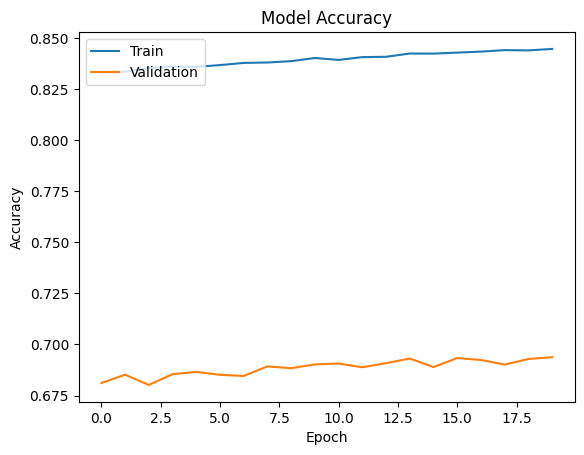

In [165]:
history=trn
print(history.history.keys())

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


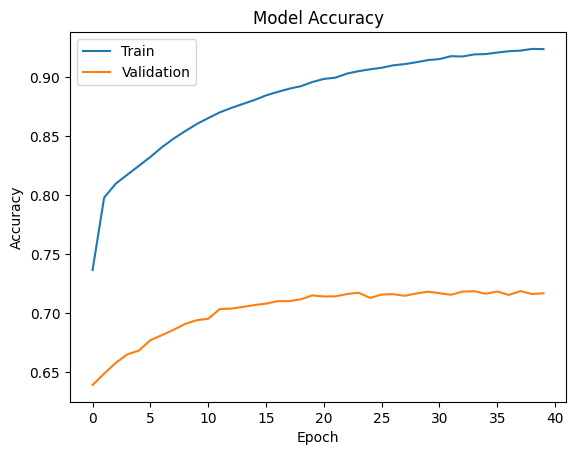

In [ ]:
history=trn
print(history.history.keys())

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
model.save('/content/model_ep-5.h5')

**TEST PHASE!!!**

In [196]:
from keras.preprocessing.sequence import pad_sequences


def padder_enc(inp):
  decoder_input_sequences = pad_sequences(inp, maxlen=outputs_maxlen, padding='post')
  print('decoder_inputs_sequences shape:', decoder_input_sequences.shape)
  return decoder_input_sequences

import numpy as np


def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(20):
        tokenized_target_sentence = target_vectorization([decoded_sentence])


        next_token_predictions = seq2seq_rnn.predict(
            [tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(next_token_predictions[0, i, :])
        sampled_token = spa_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "[end]":
            break
    return decoded_sentence

test_eng_texts = [pair[0] for pair in test_pairs]
for _ in range(20):
    input_sentence = random.choice(test_eng_texts)
    print("-")
    print(input_sentence)
    print(decode_sequence(input_sentence))

decoder_output_sequences shape: (6513, 19)


NameError: name 'target_vectorization' is not defined

In [167]:
encoder_model = Model(encoder_inputs, encoder_states) #onion
print(encoder_model.summary())

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 eng (InputLayer)            [(None, 20)]                 0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 20, 100)              271600    ['eng[0][0]']                 
                                                                                                  
 multi_head_attention_12 (M  (None, 20, 100)              206436    ['embedding_4[0][0]',         
 ultiHeadAttention)                                                  'embedding_4[0][0]']         
                                                                                                  
 tf.__operators__.add_12 (T  (None, 20, 100)              0         ['embedding_4[0][0]',  

In [168]:
decoder_input_h = Input(shape=(LSTM_NEURONS,))
decoder_input_c = Input(shape=(LSTM_NEURONS,))
decoder_input_states = [decoder_input_h, decoder_input_c]

decoder_input_word = Input(shape=(1,))
decoder_input_word_emb = decoder_embedding_layer(decoder_input_word)

decoder_outputs, h, c = decoder(decoder_input_word_emb, initial_state=decoder_input_states)
decoder_states = [h, c]

outputs = output_dense_layer(decoder_outputs)

In [169]:
decoder_model = Model([decoder_input_word]+decoder_input_states, [outputs]+decoder_states)
print(decoder_model.summary())

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_5 (Embedding)     multiple                     524300    ['input_15[0][0]']            
                                                                                                  
 input_13 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 100)]                0         []                            
                                                                                           

In [194]:
from numpy import argmax

index_to_word_input = {v:k for k,v in inputs_word2index.items()}
index_to_word_output = {v:k for k,v in outputs_word2index.items()}

def translate(input_seq):
    states = encoder_model.predict(input_seq)

    sos = outputs_word2index['<sos>']
    eos = outputs_word2index['<eos>']

    output_seq = zeros((1, 1))
    output_seq[0, 0] = sos

    output_sentence = []

    for _ in range(outputs_maxlen):

        
        output_tokens, h, c = decoder_model.predict([output_seq]+states)
        print(output_tokens.shape)
        idx = argmax(output_tokens[0, 0, :])

        if idx == eos:
            break
        word = ''
        if idx > 0:
            word = index_to_word_output[idx]
            output_sentence.append(word)

        states = [h, c]
        output_seq[0, 0] = idx

    return ' '.join(output_sentence)

In [191]:
encoder_input_sequences[12]

array([96,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [195]:
from numpy import random

i = random.choice(len(inputs))
input_seq = encoder_input_sequences[i:i+1]
print(input_seq)
translation = translate(input_seq)

print('Input:', inputs[i])

print('Response:', translation)
# input_seq

[[  1 165  20  87 815   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]
1/1 [==============================] - 0s 21ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 22ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 23ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 23ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 22ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 21ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 29ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 23ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 21ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 24ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 23ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 20ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 22ms/step
(1, 1, 5243)
1/1 [==============================] - 0s 21ms/step
(1, 1, 5243)
1/1 

# THE **SEQ2SEQ** model with **` Attention mechanism `**

In [ ]:
!wget https://www.manythings.org/anki/ben-eng.zip
!unzip -q ben-eng.zip

--2023-12-27 14:55:27--  https://www.manythings.org/anki/ben-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223209 (218K) [application/zip]
Saving to: ‘ben-eng.zip’

ben-eng.zip         100%[===================>] 217.98K  1.32MB/s    in 0.2s    

2023-12-27 14:55:27 (1.32 MB/s) - ‘ben-eng.zip’ saved [223209/223209]



In [ ]:
text_file = "/content/ben.txt"
with open(text_file) as f:
 lines = f.read().split("\n")[:-1]
text_pairs = []
len(lines)

6513

In [ ]:
for line in lines:
  eng, ben,_ = line.split("\t")
  ben = "[start] " + ben + " [end]"
  text_pairs.append((eng,ben))




In [ ]:
import random
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples:num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples:]

In [ ]:
val_pairs[:10]

[("I'll come along.", '[start] আমি সঙ্গে সঙ্গে যাবো। [end]'),
 ("Don't underestimate me.", '[start] আমাকে কোন অংশে কম মনে কোরো না। [end]'),
 ('They screamed.', '[start] ওরা চিৎকার করলো। [end]'),
 ('Leave it.', '[start] ছাড়। [end]'),
 ('Did you speak at all?', '[start] আপনি কি আদৌ কথা বলেছেন? [end]'),
 ("You'll have to wait at least an hour to get a ticket.",
  '[start] টিকিট পেতে হলে আপনাকে অন্তত এক ঘন্টা অপেক্ষা করতে হবে। [end]'),
 ('What do you want to be when you grow up?',
  '[start] তুই বড়ো হয়ে কী হতে চাস? [end]'),
 ("I can't see.", '[start] আমি দেখতে পাই না। [end]'),
 ('Have fun.', '[start] আনন্দ করুন। [end]'),
 ("We're going to see if we can do that.",
  '[start] আমরা তা করতে পারি কিনা তা দেখতে যাচ্ছি। [end]')]

In [ ]:
# strip_chars = strip_chars.replace("[", "")
# strip_chars = strip_chars.replace("]", "")
def custom_standardization(input_string):
  lowercase = tf.strings.lower(input_string)
  return tf.strings.regex_replace(
  lowercase, f"[{re.escape(strip_chars)}]", "")

**TOKENS>>>>>>>>>>>>>>>>>>**

In [ ]:
import tensorflow as tf
import string
import re
from tensorflow.keras import layers
sequence_length=50

source_vectorization = layers.TextVectorization(
  max_tokens=30000,
  output_mode="int",
  output_sequence_length=sequence_length,
  # standardize=custom_standardization
)
target_vectorization = layers.TextVectorization(
  max_tokens=30000,
  output_mode="int",
  output_sequence_length=sequence_length + 1,

)

In [ ]:
train_eng_texts = [pair[0] for pair in train_pairs]
train_ben_texts = [pair[1] for pair in train_pairs]
source_vectorization.adapt(train_eng_texts)
target_vectorization.adapt(train_ben_texts)


In [ ]:
source_vocab=source_vectorization.get_vocabulary()
# Create word-to-index dictionaries
word_to_index_source = {word: index for index, word in enumerate(source_vocab)}
len(word_to_index_source)


2289

In [ ]:
import tensorflow as tf

# Assuming source_vectorization and target_vectorization are TextVectorization layers

batch_size = 64

def format_dataset(eng, ben):
    eng = source_vectorization(eng)
    ben = target_vectorization(ben)
    # Ensure ben has the expected shape before slicing
    # ben = tf.reshape(ben, [tf.shape(ben)[0], -1])  # Reshape to 2D
    return {"eng": eng, "ben": ben[:, :-1]}, ben[:, 1:]

def make_dataset(pairs):
    eng_texts, ben_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    ben_texts = list(ben_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset.shuffle(2048).prefetch(16).cache()


In [ ]:


import tensorflow as tf

# Sample data
eng_texts = ["Hello", "How are you", "Goodbye"]
ben_texts = ["[start] Bonjour [end]", "[start] Kemon achho [end]", "[start] Bidaye [end]"]

# Create a dataset from the parallel sequences
dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))

# Iterate through the dataset
for eng_text, ben_text in dataset:
    print(f"English: {eng_text.numpy().decode('utf-8')}, Bengali: {ben_text.numpy().decode('utf-8')}")





English: Hello, Bengali: [start] Bonjour [end]
English: How are you, Bengali: [start] Kemon achho [end]
English: Goodbye, Bengali: [start] Bidaye [end]


In [ ]:
import numpy as np
train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)



In [ ]:
for inputs, targets in train_ds.take(1):
  print(f"inputs['english'].shape: {inputs['eng'].shape}")

inputs['english'].shape: (17, 50)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
vocab_size = 7000

In [ ]:
embed_dim = 256
latent_dim = 1024
source = keras.Input(shape=(None,), dtype="int64", name="eng")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(source)
encoded_source = layers.Bidirectional(
 layers.GRU(latent_dim), merge_mode="sum")(x)


In [ ]:
past_target = keras.Input(shape=(None,), dtype="int64", name="ben")
x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(past_target)
decoder_gru = layers.GRU(latent_dim, return_sequences=True)
x = decoder_gru(x, initial_state=encoded_source)
x = layers.Dropout(0.5)(x)
target_next_step = layers.Dense(vocab_size, activation="softmax")(x)


seq2seq_rnn = keras.Model([source, past_target], target_next_step)

In [ ]:
seq2seq_rnn.compile(
 optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
seq2seq_rnn.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
72/72 [==============================] - 33s 232ms/step - loss: 6.1391 - accuracy: 0.2544 - val_loss: 5.0788 - val_accuracy: 0.3212
Epoch 2/50
72/72 [==============================] - 5s 72ms/step - loss: 4.9602 - accuracy: 0.3347 - val_loss: 4.7858 - val_accuracy: 0.3488
Epoch 3/50
72/72 [==============================] - 6s 79ms/step - loss: 4.7257 - accuracy: 0.3410 - val_loss: 4.6085 - val_accuracy: 0.3610
Epoch 4/50
72/72 [==============================] - 5s 72ms/step - loss: 4.5167 - accuracy: 0.3577 - val_loss: 4.4895 - val_accuracy: 0.3695
Epoch 5/50
72/72 [==============================] - 5s 72ms/step - loss: 4.3283 - accuracy: 0.3711 - val_loss: 4.3488 - val_accuracy: 0.3842
Epoch 6/50
72/72 [==============================] - 6s 78ms/step - loss: 4.1604 - accuracy: 0.3795 - val_loss: 4.2435 - val_accuracy: 0.3942
Epoch 7/50
72/72 [==============================] - 5s 71ms/step - loss: 4.0098 - accuracy: 0.3887 - val_loss: 4.1452 - val_accuracy: 0.4005
Epoch 8/50


In [ ]:
# Save the entire model (encoder and decoder together)
seq2seq_rnn.save("seq2seq_model.h5")

# # Save the encoder and decoder models separately
# encoder_model.save("encoder_model.h5")
# decoder_model.save("decoder_model.h5")


In [ ]:
from keras.models import load_model

# Load the entire seq2seq model
loaded_seq2seq_rnn = load_model("/content/seq2seq_model.h5")

# Extract the encoder and decoder models from the loaded seq2seq model
loaded_encoder_model = loaded_seq2seq_rnn.layers[2]  # Adjust the layer index accordingly
loaded_decoder_model = loaded_seq2seq_rnn.layers[3]  # Adjust the layer index accordingly


In [ ]:
import numpy as np
spa_vocab = target_vectorization.get_vocabulary()
spa_index_lookup = dict(zip(range(len(spa_vocab)), spa_vocab))
max_decoded_sentence_length = 20

def decode_sequence(input_sentence):
    tokenized_input_sentence = source_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = target_vectorization([decoded_sentence])
        next_token_predictions = seq2seq_rnn.predict(
            [tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(next_token_predictions[0, i, :])
        sampled_token = spa_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token
        if sampled_token == "end":
            break
    return decoded_sentence

In [ ]:
test_eng_texts = [pair[0] for pair in test_pairs]
for _ in range(10):
 input_sentence = random.choice(test_eng_texts)
 print("-")
 print(input_sentence)
 print(decode_sequence(input_sentence))

-
Take me to the hospital.
1/1 [==============================] - 0s 23ms/step
[start] আমাকে হাসপাতালে নিয়ে চলো। end
-
He hasn't come yet.
1/1 [==============================] - 0s 24ms/step
[start] সে এখনো আসেনি। end
-
He was giving a speech.
1/1 [==============================] - 0s 26ms/step
[start] উনি বক্তৃতা দিচ্ছিলেন। end
-
Japan is in Asia.
1/1 [==============================] - 0s 22ms/step
[start] ভবনটিতে কোথায় end
-
She married him.
1/1 [==============================] - 0s 34ms/step
[start] সে তাকে কথা বলে। end
-
Tom lied about his age to get into the club.
1/1 [==============================] - 0s 24ms/step
[start] টম বলেছিল যে সে ব্যবস্থাপককে মেরি এড়িয়ে দেখতে পেল। end
-
May I open the window?
1/1 [==============================] - 0s 26ms/step
[start] আমি কি একটা ছবি তুলতে পারি end
-
You look sick.
1/1 [==============================] - 0s 24ms/step
[start] তোমাকে দেখে অসুস্থ বলে মনে হচ্ছে। end
-
We'll work on that.
1/1 [==============================] - 0s 23ms/step


In [ ]:
import tensorflow as tf


print('\n\n\n\n\n\n\n')

def format_dataset(eng, ben):
    eng = source_vectorization(eng)

    # Print the original Bengali sentence before tokenization
    tf.print("Original Bengali Sentence:", ben)

    ben = target_vectorization(ben)
    print('kire mama')
    # Print the tokenized Bengali sentence
    tf.print("Tokenized Bengali Sentence:", ben)

    # Ensure ben has the expected shape before slicing
    ben = tf.reshape(ben, [tf.shape(ben)[0], -1])  # Reshape to 2D

    # Prepare inputs and targets for the model
    inputs = {"eng": eng, "ben": ben[:, :-1]}
    targets = ben[:, 1:]

    return inputs, targets



eng_texts = ["Hello", "How are you", "Goodbye"]
ben_texts = ["[start] Bonjour [end]", "[start] Kemon achho [end]", "[start] Bidaye [end]"]

# Create a dataset from the parallel sequences
dataset = tf.data.Dataset.from_tensor_slices((eng_texts, ben_texts))

dataset = dataset.map(format_dataset)

In [ ]:
# !gdown 'https://docs.google.com/uc?export=download&id=1FLlC0NNXFKVGaVM3-cYW-XEx8p8eV3Wm'
!bunzip2 '/content/hasan-etal-2020-low.tar.bz2'

In [ ]:
import shutil
shutil.unpack_archive('/content/hasan-etal-2020-low.tar', '/content/drive/MyDrive/translt') # this will extract the file to the myfolder directory


In [ ]:

text_file ='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt'
with open(text_file) as f:
 lines = f.read().split("\n")[:-1]
text_pairs = []
len(lines)

2753069

In [ ]:
lines[:20]

['সে ঘুরে ল্যাংডনের চোখের দিকে তাকায়।',
 'সব মানুষের মধ্যে সমতা আনতে হলে কারও না কারও স্বাধীনতায় হস্তক্ষেপ করতেই হবে।',
 'যাই জিজ্ঞেস কর না কেন, সব প্রশ্নের জবাব দিব ডিনারের পর।',
 'ঠিক যখন আমি সভাকে শুভরাত জানিয়ে বিদায় নিতে উদ্যত, একজন লোক সত্বর আমার কাছে এসে নিজের পরিচয় দেয়।',
 'যেতে দিন!',
 'এবার ক্যামারলেনগো ঘুরে দাঁড়াল আবার, তাকাল অন্য সৈনিকদের দিকে, জোয়ানগণ, আমি আর কোন প্রাণঘাতি ঘটনা দেখতে চাই না এই সন্ধ্যায়।',
 'তাদের ট্যাক্সি এখন কোথায়?',
 'বেশিরভাগ গবেষকই মনে করেন যে, এতসব গুরুত্বপূর্ণ আবিষ্কারের পেছনে নিশ্চয়ই সেপিয়েন্সদের বুদ্ধিবৃত্তিক দক্ষতার কোনো পরিবর্তন দায়ী।',
 'দশকের পর দশক ধরে এসব প্রাণীর জীবাশ্ম আর দেহাবশেষের খোঁজে দুই আমেরিকার পাহাড় ও সমতলে চষে বেড়াচ্ছেন বিশেষজ্ঞরা। যখনই তাঁরা কোনো কিছু খুঁজে পাচ্ছেন পরম যত্নে সেগুলো পাঠিয়ে দিচ্ছেন গবেষণাগারে।',
 'এটা প্রাপ্ত বয়স্কদের জন্য এক রকমের স্কুলও বলা চলে।',
 'বলে চললেন হোয়াইট ম্যাসোন, বন্দুকটা আমেরিকান শট গানই বটে।',
 "মা'র অসুখের শেষের দিকে একবার ভিয়েনায় গিয়েছিলাম আকাদমি অফ্ ফাইন আর্টসে প্রবেশিকা পরীক্ষা দেওয়ার জন্য।",
 'এক

### **the 2mil dataset!!!!**

In [ ]:
text_file = "/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt"
with open(text_file) as f:
 lines = f.read().split("\n")[:-1]
text_pairs = []
len(lines)

2753069

In [ ]:
len(lines)

2753069

In [ ]:
mx = 0
snt = ''
pos = 0
ave = 0
nlst = []
overnt=0
undr=0
limit=50
for i, s in enumerate(lines):
    ln = len(s.split())
    if ln<=limit:
      undr+=1

    if ln > limit:
        overnt+=1
        continue  # Skip sentences with length greater than 250

    nlst.append(s)  # Append the sentence to nlst if length is less than or equal to 250

    ave += ln

    if mx < ln:
        mx = ln
        snt = s
        pos = i

# Print or use mx, snt, pos, ave as needed

# Print the new list nlst
print("over {} under {} %={}".format(overnt,undr,(overnt/undr)*100))


over 25310 under 2725725 %=0.9285602912986453


In [ ]:
len(lines),len(nlst)

(2752306, 2751035)

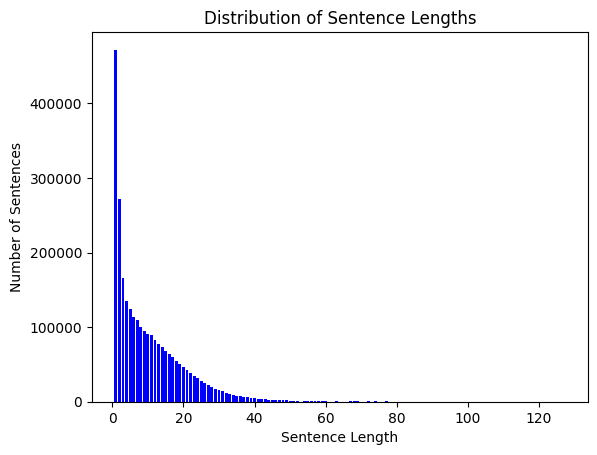

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

lines=nlst

sentence_lengths = [len(sentence.split()) for sentence in lines]

# Count the occurrences of each length
length_counts = Counter(sentence_lengths)

# Extract unique lengths and their counts
unique_lengths = list(length_counts.keys())
counts = list(length_counts.values())

# Plotting
plt.bar(unique_lengths[:70], counts[:70], color='blue')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Lengths')
plt.show()

In [ ]:
ben_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/ben.txt'
eng_txt='/content/drive/MyDrive/translt/hasan-etal-2020-low/2.75M/eng.txt'


with open(ben_txt) as f:
 ben_lst = f.read().split("\n")[:-1]
with open(eng_txt) as f:
 en_lst = f.read().split("\n")[:-1]
len(ben_lst),len(en_lst)

(2753069, 2753069)

In [ ]:
text_pairs=[]
for eng,ben in zip(en_lst,ben_lst):
  if len(ben.split())>50:
    continue
  ben = "[start] " + ben + " [end]"
  text_pairs.append((eng,ben))
len(text_pairs)

text_pairs[:10]


[('He turned to look Langdon in the eye.',
  '[start] সে ঘুরে ল্যাংডনের চোখের দিকে তাকায়। [end]'),
 ('better o . Guaranteeing that every individual will be free to do as he wishes',
  '[start] সব মানুষের মধ্যে সমতা আনতে হলে কারও না কারও স্বাধীনতায় হস্তক্ষেপ করতেই হবে। [end]'),
 ('"What do you say I tell you over dinner."',
  '[start] যাই জিজ্ঞেস কর না কেন, সব প্রশ্নের জবাব দিব ডিনারের পর। [end]'),
 ('When I was just about to say good-night to the assembly and to leave, a man came after me quickly and introduced himself.',
  '[start] ঠিক যখন আমি সভাকে শুভরাত জানিয়ে বিদায় নিতে উদ্যত, একজন লোক সত্বর আমার কাছে এসে নিজের পরিচয় দেয়। [end]'),
 ('Let me pass."', '[start] যেতে দিন! [end]'),
 ('Now the camerlegno turned and addressed the remaining guards.',
  '[start] এবার ক্যামারলেনগো ঘুরে দাঁড়াল আবার, তাকাল অন্য সৈনিকদের দিকে, জোয়ানগণ, আমি আর কোন প্রাণঘাতি ঘটনা দেখতে চাই না এই সন্ধ্যায়। [end]'),
 ('"Where is their taxi now?', '[start] তাদের ট্যাক্সি এখন কোথায়? [end]'),
 ("evidence for religion

In [ ]:
eng_sentences, ben_sentences = zip(*text_pairs)

# Tokenize and count unique words in English sentences
eng_unique_words = set(word for sentence in eng_sentences for word in sentence.split())

# Tokenize and count unique words in Bengali sentences
ben_unique_words = set(word for sentence in ben_sentences for word in sentence.split())

# Print or use the counts as needed
print("Unique words in English sentences:", len(eng_unique_words))
print("Unique words in Bengali sentences:", len(ben_unique_words))


Unique words in English sentences: 1055685
Unique words in Bengali sentences: 1271342


In [ ]:
lim=100
ls=list(eng _unique_words)
for x in range(len(ls)):
  print(ls[x])
  if x>lim:break

SyntaxError: ignored

In [ ]:
import nltk

# Example reference translations and candidate translations
references = [['i was the best'], ['who are you']]  # List of lists, each containing reference translations
candidates = ['i am the best', 'who are they']  # List of candidate translations

# Tokenize the references
tokenized_references = [[reference.split() for reference in reference_set] for reference_set in references]

# Tokenize the candidates
tokenized_candidates = [candidate.split() for candidate in candidates]

# Compute corpus-level BLEU score
corpus_bleu_score = nltk.translate.bleu_score.corpus_bleu(tokenized_references, tokenized_candidates)
print(f"Corpus BLEU Score: {corpus_bleu_score}")


TypeError: 'ellipsis' object is not iterable

In [ ]:
 [[reference for reference in reference_set] for reference_set in references]

TypeError: 'ellipsis' object is not iterable